In [22]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

In [2]:
#Read Data
input_path = r'C:\Users\Iris\Desktop\Udacity_Data_Scientist_ND\Project1-Blog//'

#Seattle Airbnb Data
calendar = pd.read_csv(input_path + 'seattle-airbnb-open-data//calendar.csv')
listings = pd.read_csv(input_path + 'seattle-airbnb-open-data//listings.csv')


In [269]:
calendar.head()

,listing_id,date,available,price,date_YYYY_MM,date_month
0,241032,2016-01-04,t,85.0,2016-01,1
1,241032,2016-01-05,t,85.0,2016-01,1
2,241032,2016-01-06,f,NaN,2016-01,1
3,241032,2016-01-07,f,NaN,2016-01,1
4,241032,2016-01-08,f,NaN,2016-01,1


In [268]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Create Year-Month by Date
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['date_YYYY_MM'] = calendar['date'].dt.strftime('%Y-%m')
calendar['date_month'] = calendar['date'].dt.month

In [4]:
calendar[calendar['price'].isna()]['available'].unique()

array(['f'], dtype=object)

In [5]:
# The price column is string type with dollar sign, convert it to float.

calendar['price'] = calendar[calendar['price'].notna()]['price'].apply(lambda x: x.strip('$'))
calendar['price'] = calendar[calendar['price'].notna()]['price'].apply(lambda x: x.replace(',', ''))

def float_or_na(value):
    return float(value) if value != 'NaN' else None

calendar['price'] = calendar['price'].apply(float_or_na)

In [49]:
# convert price column from string to float

listings['price'] = listings[listings['price'].notna()]['price'].apply(lambda x: x.strip('$'))
listings['price'] = listings[listings['price'].notna()]['price'].apply(lambda x: x.replace(',', ''))

In [50]:
listings['price'] = np.asarray(listings['price'], dtype='float64')

## Overview: number of listings and average price in each neighborhood

In [101]:
nb_overview = listings.groupby('neighbourhood_cleansed')['id','price'].agg({'id':'count',
                                                             'price':'mean'}).reset_index().rename(columns={'id':'Number of Listing',
                                                                                                           'price':'average price',
                                                                                                           'neighbourhood_cleansed':'neighbourhood'})

In [102]:
nb_overview.sort_values(['Number of Listing'],ascending=False,inplace=True)

In [270]:
nb_overview

,neighbourhood,Number of Listing,average price
9,Broadway,397,123.889169
4,Belltown,234,162.893162
79,Wallingford,167,128.431138
21,Fremont,158,129.056962
47,Minor,135,121.800000
76,University District,122,93.639344
74,Stevens,119,133.210084
20,First Hill,108,136.425926
12,Central Business District,103,164.213592
38,Lower Queen Anne,94,138.202128


## 15 Neighbourhoods with the most listings

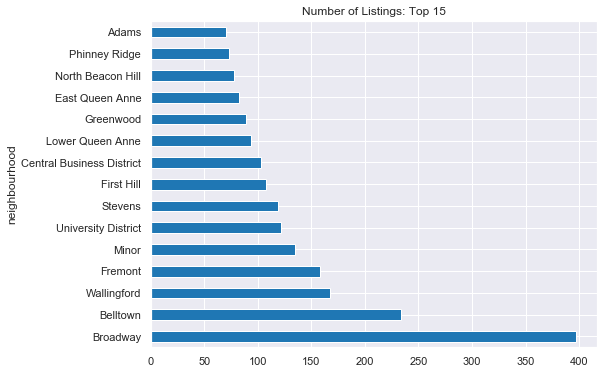

In [263]:
listings.groupby('neighbourhood_cleansed').id.size().sort_values(ascending=False).head(15).plot(kind = 'barh', color = base_color, figsize = (8, 6));
plt.ylabel('neighbourhood')
plt.title('Number of Listings: Top 15');
plt.show()

## 15 Neighbourhoods with the highest price

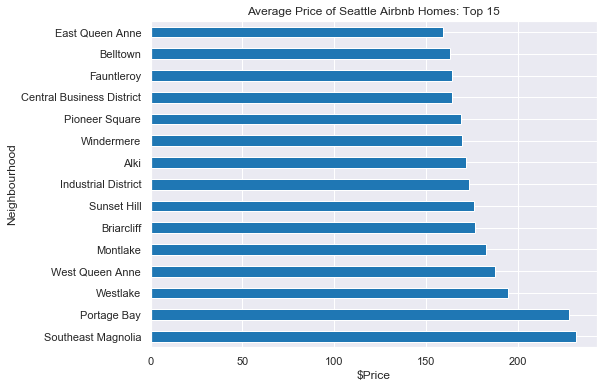

In [161]:
listings.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False).head(15).plot(kind = 'barh', color = base_color, figsize = (8, 6));
plt.ylabel('Neighbourhood')
plt.xlabel('$Price')
plt.title('Average Price of Seattle Airbnb Homes: Top 15');
plt.show()

## Monthly Booked Rate

In [60]:
available_rate = calendar.groupby(['date_YYYY_MM','available'])['date_month'].count().reset_index()

In [61]:
# calculate booked_rae by (booked frequency)/(booked frequency + unbooked frequency)

booked_rate = calendar.groupby(['date_YYYY_MM','available'])['date_month'].count().unstack()
booked_rate['booked_rate'] = booked_rate['f']/(booked_rate['f']+booked_rate['t'])

In [62]:
booked_rate= booked_rate.reset_index()
booked_rate = booked_rate[['date_YYYY_MM', 'booked_rate']]

In [63]:
available_rate = pd.merge(available_rate, booked_rate, how='left', on='date_YYYY_MM')

In [64]:
available_rate.rename(columns={'date_month' : 'count'}, inplace=True)

In [65]:
available_rate['available'] = np.where(available_rate['available']=='f',
                                      'booked',
                                      'available')

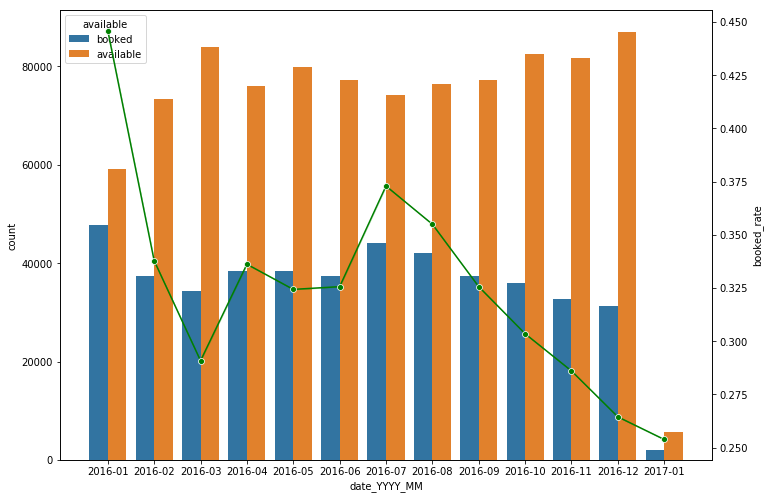

In [66]:
fig, ax1 = plt.subplots(figsize=(11.7,8.27))
ax2 = ax1.twinx()
sns.barplot(x="date_YYYY_MM", 
            y="count", 
            hue="available", 
            data =available_rate, ax=ax1)

sns.lineplot(x="date_YYYY_MM", 
            y="booked_rate", 
             color='green',
             marker="o",
             data = available_rate,
             ax=ax2)
plt.show()
sns.set()

## Monthly Available Houses v.s. Average Price

In [67]:
# total number of available home each day
avaliable_count = calendar.groupby('date').apply(lambda x: x.notnull().sum())[['price']]
# change column name
avaliable_count = avaliable_count.rename({"price":"total_available_houses"},axis='columns')

In [68]:

# everyday average prices
calendar_open = calendar[calendar.price.notnull()]
# average house price for boston everyday
average_price = calendar_open.groupby('date').mean()[['price']]
# change column name
average_price = average_price.rename({"price":"average_prices"},axis='columns')

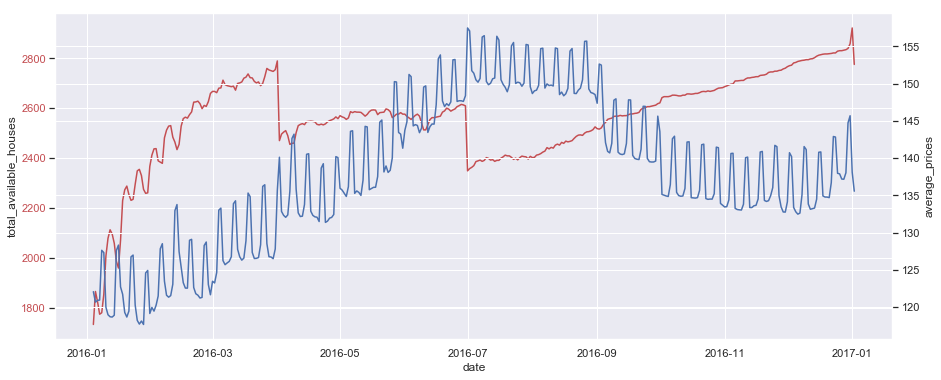

In [71]:

# plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count.index,y = 'total_available_houses', 
                  data = avaliable_count,color="r",legend=False)
for tl in ax.get_yticklabels():
    tl.set_color('r')

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price.index,y = 'average_prices',
             data=average_price,ax=ax2,linestyle=':', legend=False)

## 15 highest rating Neighborhoods

In [164]:
listings['review_scores_rating'].describe()

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [264]:
reviews = listings.groupby(['neighbourhood_cleansed'])['review_scores_rating','price'].agg(
    {'review_scores_rating':'mean',
     'price':'mean'}).round(1).sort_values(['review_scores_rating'], ascending=False).reset_index()
reviews.head(15)

,neighbourhood_cleansed,review_scores_rating,price
0,Arbor Heights,98.0,126.8
1,Southeast Magnolia,97.2,231.7
2,Riverview,97.2,80.5
3,Harrison/Denny-Blaine,97.1,114.9
4,Madrona,97.1,158.2
5,North Beach/Blue Ridge,96.9,128.3
6,Genesee,96.9,122.0
7,Laurelhurst,96.8,108.4
8,Whittier Heights,96.7,128.7
9,North Delridge,96.6,76.4


## Neighborhoods have good reviews and affordable prices

In [167]:
most_listing = listings.groupby('neighbourhood_cleansed').id.size().sort_values(ascending=False).head(15).reset_index()

In [229]:
reviews_top = reviews[reviews['review_scores_rating'] > listings['review_scores_rating'].mean()]
reviews_top = reviews_top[reviews_top['neighbourhood_cleansed'].isin(list(most_listing['neighbourhood_cleansed']))]
#reviews_top.set_index('neighbourhood_cleansed')

In [231]:
list(reviews_top['neighbourhood_cleansed'])

['East Queen Anne',
 'Minor',
 'Fremont',
 'Adams',
 'Phinney Ridge',
 'Lower Queen Anne',
 'Stevens',
 'Central Business District']

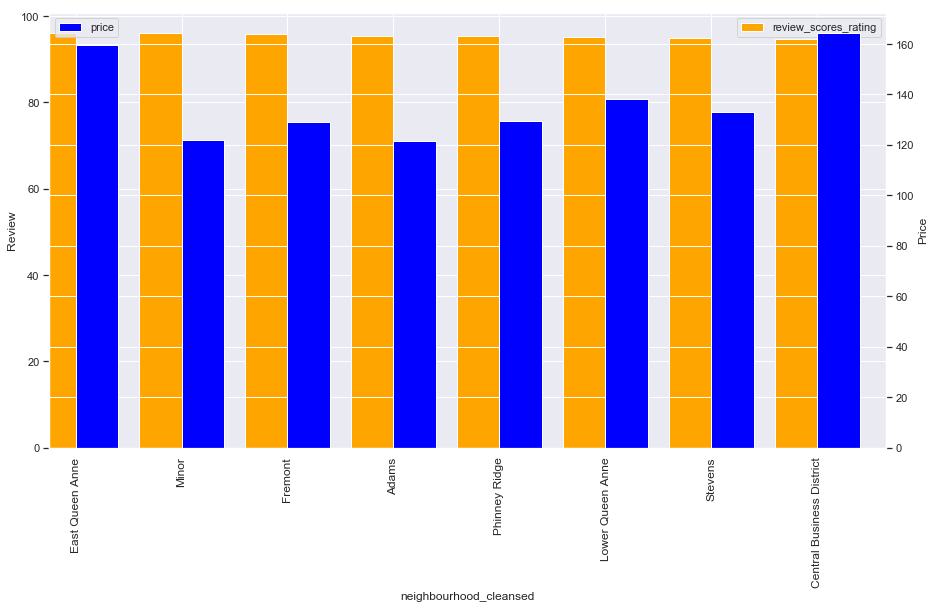

In [259]:
fig = plt.figure(figsize=[15,8]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

reviews_top.plot( x = 'neighbourhood_cleansed', y="review_scores_rating", kind='bar', color='orange', ax=ax, width=width, position=1)
reviews_top.plot(x = 'neighbourhood_cleansed', y = 'price',kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Review')
ax2.set_ylabel('Price')

ax.set_xticklabels(list(reviews_top['neighbourhood_cleansed']), fontsize=12)
#plt.xlabel('Neighbourhood_cleansed')

plt.show()

## Conclusion
From what I have researched from the Airbnb Seattle dataset, the listings number shows an obvious increasing tendency over a whole year in 2016. March and April would be the most economical time to visit Seattle. I recommend the neighborhoods: Minor, Fremont, Adams and Primary Ridge which have lots of choices, good reviews, and affordable prices.